# Team assignment - Boston

## 1 Data collection and preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Bike rentals

Read data on bike rentals:

In [2]:
bike = pd.read_csv("boston_2016.csv")

In [3]:
#for later use
bike15 = pd.read_csv("boston_2015.csv")
bike17 = pd.read_csv("boston_2017.csv")
bike18 = pd.read_csv("boston_2018.csv")
bike19 = pd.read_csv("boston_2019.csv")

C:\Users\lucas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
bike.colums #prob. not possible because data type is not an (python) object

AttributeError: 'DataFrame' object has no attribute 'colums'

In [5]:
bike.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_time          1236203 non-null  object
 1   end_time            1236203 non-null  object
 2   start_station_id    1236203 non-null  int64 
 3   end_station_id      1236203 non-null  int64 
 4   start_station_name  1236203 non-null  object
 5   end_station_name    1236203 non-null  object
 6   bike_id             1236203 non-null  int64 
 7   user_type           1236203 non-null  object
dtypes: int64(3), object(5)
memory usage: 75.5+ MB


Number of entries (1236203) = Non-Null count for all colums, meaning we are not missing any values.

**Cleaning the datset:**

In [7]:
bike.isnull()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1236198,False,False,False,False,False,False,False,False
1236199,False,False,False,False,False,False,False,False
1236200,False,False,False,False,False,False,False,False
1236201,False,False,False,False,False,False,False,False


In [8]:
#transforming Dtype of start_time/end_time from object to datetime
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1236203 non-null  datetime64[ns]
 1   end_time            1236203 non-null  datetime64[ns]
 2   start_station_id    1236203 non-null  int64         
 3   end_station_id      1236203 non-null  int64         
 4   start_station_name  1236203 non-null  object        
 5   end_station_name    1236203 non-null  object        
 6   bike_id             1236203 non-null  int64         
 7   user_type           1236203 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 75.5+ MB


In [9]:
# Creates column that provides the duration of the rental period
bike['trip_duration'] = bike['end_time']-bike['start_time']
bike.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41


**Elimination**

In [36]:
# Dropping entries with negative trip duration
bike = bike[bike['trip_duration'] >= pd.Timedelta(0)]
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236200 entries, 0 to 1236202
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1236200 non-null  datetime64[ns] 
 1   end_time            1236200 non-null  datetime64[ns] 
 2   start_station_id    1236200 non-null  int64          
 3   end_station_id      1236200 non-null  int64          
 4   start_station_name  1236200 non-null  object         
 5   end_station_name    1236200 non-null  object         
 6   bike_id             1236200 non-null  int64          
 7   user_type           1236200 non-null  object         
 8   trip_duration       1236200 non-null  timedelta64[ns]
 9   weekday             1236200 non-null  int64          
dtypes: datetime64[ns](2), int64(4), object(3), timedelta64[ns](1)
memory usage: 103.7+ MB


In [34]:
bike["weekday"] = bike["start_time"].dt.dayofweek
bike.head(60000)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration,weekday
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19,4
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08,4
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14,4
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49,4
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41,4
...,...,...,...,...,...,...,...,...,...,...
59995,2016-03-28 16:30:21,2016-03-28 16:32:40,91,80,One Kendall Square at Hampshire St / Portland St,MIT Stata Center at Vassar St / Main St,769,Customer,0 days 00:02:19,0
59996,2016-03-28 16:31:49,2016-03-28 16:36:49,108,115,Harvard University / SEAS Cruft-Pierce Halls a...,Porter Square Station,1109,Subscriber,0 days 00:05:00,0
59997,2016-03-28 16:32:14,2016-03-28 16:40:06,189,88,Kendall T,Inman Square at Vellucci Plaza / Hampshire St,1051,Subscriber,0 days 00:07:52,0
59998,2016-03-28 16:32:28,2016-03-28 16:42:43,22,38,South Station - 700 Atlantic Ave.,TD Garden - Causeway at Portal Park #2,1081,Subscriber,0 days 00:10:15,0


### Weather

Read weather data:

In [12]:
weatherhour = pd.read_csv("weather_hourly_boston.csv")

In [13]:
weatherhour.colums #prob. not possible because data type is not an (python) object

AttributeError: 'DataFrame' object has no attribute 'colums'

In [35]:
weatherhour.head(3)

,max_temp,min_temp,precip,interp_maxtemp,interp_mintemp,interp_precip,update_maxtemp,update_mintemp,update_precip
2015-01-01 06:00:00,-5.6,-5.6,0.0,-5.6,-5.6,0.0,-5.6,-5.6,0.0
2015-01-01 07:00:00,-5.6,-5.6,0.0,-5.6,-5.6,0.0,-5.6,-5.6,0.0
2015-01-01 08:00:00,-5.6,-5.6,0.0,-5.6,-5.6,0.0,-5.6,-5.6,0.0


In [15]:
weatherhour.describe()

,max_temp,min_temp,precip
count,43354.000000,43354.000000,43356.000000
mean,11.456717,11.395922,0.095581
std,10.118606,10.114095,0.294019
min,-22.800000,-22.800000,0.000000
25%,3.300000,3.300000,0.000000
50%,11.700000,11.700000,0.000000
75%,20.000000,19.850000,0.000000
max,36.100000,36.100000,1.000000


In [16]:
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43356 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


Number of entries (43848) != Non-Null count for all colums, meaning we are (!) missing values.

In [17]:
#transforming Dtype of date_time from object to datetime
weatherhour['date_time'] = pd.to_datetime(weatherhour['date_time'])
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43354 non-null  datetime64[ns]
 1   max_temp   43354 non-null  float64       
 2   min_temp   43354 non-null  float64       
 3   precip     43356 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


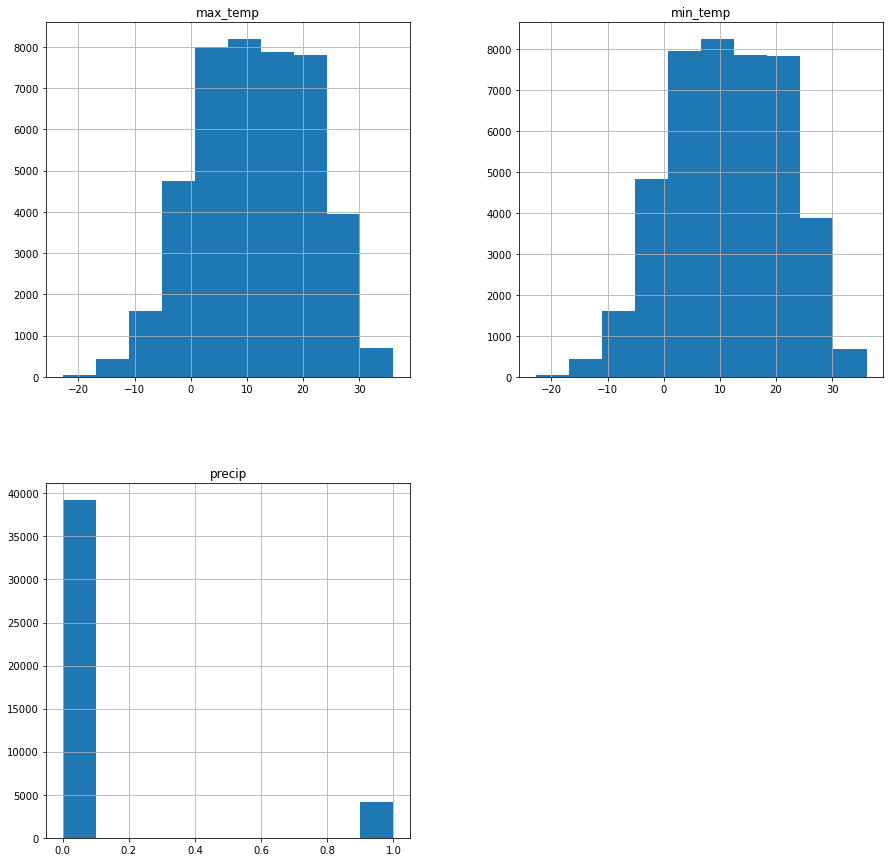

In [18]:
# Histogram of all numeric fields
weatherhour_hist = weatherhour.drop(columns=['date_time'],axis=1)
weatherhour_hist.hist(figsize=(15,15));

**Cleaning the datset:**

In [19]:
weatherhour.isnull()

,date_time,max_temp,min_temp,precip
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
43843,False,False,False,False
43844,False,False,False,False
43845,False,False,False,False
43846,False,False,False,False


In [20]:
#display entries with NaN values
NaN_for_attribute = weatherhour[weatherhour["date_time"].isna()] #insert any attribute
NaN_for_attribute

,date_time,max_temp,min_temp,precip
98,NaT,NaN,NaN,NaN
145,NaT,NaN,NaN,NaN
304,NaT,NaN,NaN,NaN
395,NaT,NaN,NaN,NaN
588,NaT,NaN,NaN,NaN
...,...,...,...,...
43019,NaT,NaN,NaN,NaN
43428,NaT,NaN,NaN,NaN
43570,NaT,NaN,NaN,NaN
43594,NaT,NaN,NaN,NaN


Mostly, for given entries values are missing for all attributes.

**Elimination**

In [21]:
# Dropping rows with missing values.
weatherhour.dropna(axis=0, inplace=True)
NaN_for_attribute = weatherhour[weatherhour["date_time"].isna()] #insert any attribute
NaN_for_attribute

,date_time,max_temp,min_temp,precip


In [22]:
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43354 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43354 non-null  datetime64[ns]
 1   max_temp   43354 non-null  float64       
 2   min_temp   43354 non-null  float64       
 3   precip     43354 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 MB


In [23]:
# Dropping duplicates (date_time)
# Only date_time is faulty, dropping duplicates leads to less data! 
# We should fix this by just manipulating the entries in the date_time column.
weatherhour.drop_duplicates(subset='date_time', keep='first', inplace=True, ignore_index=False)
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40889 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  40889 non-null  datetime64[ns]
 1   max_temp   40889 non-null  float64       
 2   min_temp   40889 non-null  float64       
 3   precip     40889 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB


**Imputation** <br>
To maintain the completeness of the time series dataset, we have decided to impute missing values.

In [24]:
# Extending the dataframe with missing time stamps
# Set the index to the datetime column
weatherhour.index = pd.to_datetime(weatherhour['date_time'])

# Generate a sequence of hourly dates between the start and end dates of the data
dates = pd.date_range(start=weatherhour.index.min(), end=weatherhour.index.max(), freq='H')

# Reindex the dataframe with the new dates
weatherhour = weatherhour.reindex(dates)

weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43848 entries, 2015-01-01 06:00:00 to 2020-01-02 05:00:00
Freq: H
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  40889 non-null  datetime64[ns]
 1   max_temp   40889 non-null  float64       
 2   min_temp   40889 non-null  float64       
 3   precip     40889 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 MB


In [25]:
weatherhour.head()

,date_time,max_temp,min_temp,precip
2015-01-01 06:00:00,2015-01-01 06:00:00,-5.6,-5.6,0.0
2015-01-01 07:00:00,2015-01-01 07:00:00,-5.6,-5.6,0.0
2015-01-01 08:00:00,2015-01-01 08:00:00,-5.6,-5.6,0.0
2015-01-01 09:00:00,2015-01-01 09:00:00,-4.4,-4.4,0.0
2015-01-01 10:00:00,2015-01-01 10:00:00,-5.6,-5.6,0.0


In [27]:
# Deletes date_time column as it is now our index
weatherhour.drop('date_time', axis=1, inplace=True)

KeyError: "['date_time'] not found in axis"

In [28]:
weatherhour.head()

,max_temp,min_temp,precip
2015-01-01 06:00:00,-5.6,-5.6,0.0
2015-01-01 07:00:00,-5.6,-5.6,0.0
2015-01-01 08:00:00,-5.6,-5.6,0.0
2015-01-01 09:00:00,-4.4,-4.4,0.0
2015-01-01 10:00:00,-5.6,-5.6,0.0


In [29]:
# Imputing missing values by means of interpolation
weatherhour['interp_maxtemp']  = weatherhour['max_temp'].interpolate()   # mean of prev/next
weatherhour['interp_mintemp']  = weatherhour['min_temp'].interpolate()   # mean of prev/next
weatherhour['interp_precip']  = weatherhour['precip'].interpolate()   # mean of prev/next
weatherhour['update_maxtemp'] = weatherhour['interp_maxtemp']
weatherhour['update_maxtemp'].update( weatherhour['max_temp'] )  # note: this is an inplace operation
weatherhour['update_mintemp'] = weatherhour['interp_mintemp']
weatherhour['update_mintemp'].update( weatherhour['min_temp'] )  # note: this is an inplace operation
weatherhour['update_precip'] = weatherhour['interp_precip']
weatherhour['update_precip'].update( weatherhour['precip'] )  # note: this is an inplace operation
weatherhour.head(98)

,max_temp,min_temp,precip,interp_maxtemp,interp_mintemp,interp_precip,update_maxtemp,update_mintemp,update_precip
2015-01-01 06:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 07:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 08:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 09:00:00,-4.4,-4.4,0.0,-4.40,-4.40,0.0,-4.40,-4.40,0.0
2015-01-01 10:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
...,...,...,...,...,...,...,...,...,...
2015-01-05 03:00:00,NaN,NaN,NaN,10.85,10.60,1.0,10.85,10.60,1.0
2015-01-05 04:00:00,10.6,10.6,1.0,10.60,10.60,1.0,10.60,10.60,1.0
2015-01-05 05:00:00,10.0,10.0,0.0,10.00,10.00,0.0,10.00,10.00,0.0
2015-01-05 06:00:00,NaN,NaN,NaN,8.35,8.35,0.0,8.35,8.35,0.0


### Stations

In [30]:
stations = pd.read_csv("current_bluebikes_stations.csv")
stations.head()

,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,2021.0
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11,2021.0
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,17,2014.0
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,2018.0
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2020.0


In [31]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number           448 non-null    object 
 1   Name             448 non-null    object 
 2   Latitude         448 non-null    float64
 3   Longitude        448 non-null    float64
 4   District         444 non-null    object 
 5   Public           448 non-null    object 
 6   Total docks      448 non-null    int64  
 7   Deployment Year  443 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 28.1+ KB


In [32]:
NaN_for_attribute2 = stations[stations["Deployment Year"].isna()]
NaN_for_attribute2

,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year
7,S32049,515 Somerville Ave (Temp. Winter Location),42.383227,-71.106069,NaN,Yes,19,NaN
65,D32056,Boylston St at Charles St,42.352576,-71.067644,Boston,Yes,31,NaN
83,S32044,Broadway Opposite Norwood Ave (Temp Winter St...,42.396764,-71.102376,Somerville,Yes,15,NaN
236,M32083,John Ahern Field at Kennedy-Longfellow School,42.369036,-71.086310,NaN,Yes,19,NaN
401,S32042,Trum Field @ Cedar St (Temp Winter Station),42.398444,-71.107833,Somerville,Yes,19,NaN


## 2 Descriptive Analytics

### KPIs - Fleet operation

Total number of rentals per day:

Text(0, 0.5, 'Total number of rentals per day')

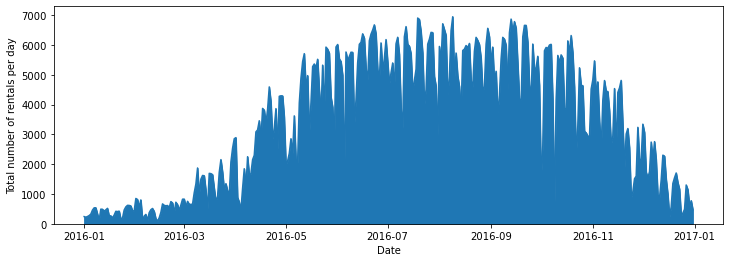

In [104]:
bikeplot = bike.groupby(bike["start_time"].rename('Date').dt.date).size()

fig, axs = plt.subplots(figsize=(12, 4))
bikeplot.plot.area(ax=axs)
axs.set_ylabel('Total number of rentals per day')

Total number of rentals per hour:

Text(0, 0.5, 'Total number of rentals per hour')

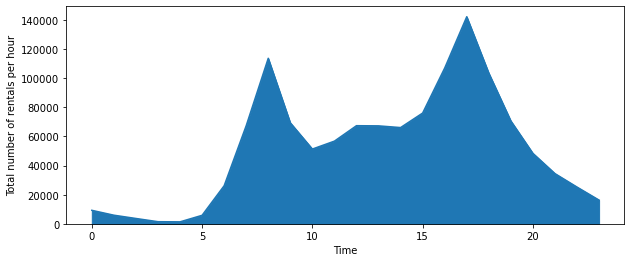

In [102]:
bikeplot2 = bike.groupby(bike["start_time"].rename('Time').dt.hour).size()

fig, axs = plt.subplots(figsize=(10,4))
bikeplot2.plot.area(ax=axs)
axs.set_ylabel('Total number of rentals per hour')

Text(0, 0.5, 'Total number of rentals per month')

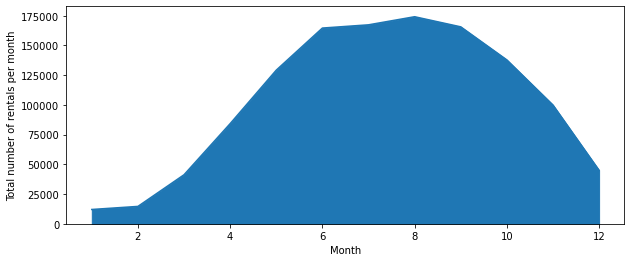

In [123]:
bikeplot2 = bike.groupby(bike["start_time"].rename('Month').dt.month).size()

fig, axs = plt.subplots(figsize=(10,4))
bikeplot2.plot.area(ax=axs)
axs.set_ylabel('Total number of rentals per month')

Average usage time...

In [38]:
# Merging bike and staion datasets
stations.rename(columns={'Name': 'start_station_name'}, inplace=True)
bike_station = pd.merge(bike, stations, on='start_station_name')

... based on time of day:

In [49]:
bike_station.groupby(bike_station['start_time'].dt.hour)['trip_duration'].mean()

start_time
0    0 days 01:12:32.202344553
1    0 days 00:34:32.346409629
2    0 days 00:35:31.946386825
3    0 days 00:37:22.236057632
4    0 days 00:16:01.044994690
5    0 days 00:35:23.200573383
6    0 days 00:14:30.653241931
7    0 days 00:38:01.747030717
8    0 days 00:23:01.065738101
9    0 days 00:14:23.730516525
10   0 days 00:17:02.541590853
11   0 days 00:17:33.158350320
12   0 days 00:18:15.411411392
13   0 days 00:19:08.947904359
14   0 days 00:26:57.239758787
15   0 days 00:20:14.872788384
16   0 days 00:18:04.426416404
17   0 days 00:19:39.608886130
18   0 days 00:16:57.156870885
19   0 days 00:16:46.761157863
20   0 days 00:16:10.496637211
21   0 days 00:16:17.068401750
22   0 days 00:32:28.377506650
23   0 days 00:16:05.670735659
Name: trip_duration, dtype: timedelta64[ns]

... based on user type:

In [40]:
bike_station.groupby('user_type')['trip_duration'].mean()

user_type
Customer     0 days 00:45:47.386605299
Subscriber   0 days 00:15:20.670072523
Name: trip_duration, dtype: timedelta64[ns]

... based on start station:

In [41]:
bike_station.groupby('start_station_name')['trip_duration'].mean()

start_station_name
175 N Harvard St                                                     0 days 00:13:45.545705882
359 Broadway - Broadway at Fayette Street                            0 days 00:13:14.150516833
Airport T Stop - Bremen St at Brooks St                              0 days 00:42:07.144251497
Alewife MBTA at Steel Place                                          0 days 01:00:07.549475490
Alewife Station at Russell Field                                     0 days 00:24:21.391205087
                                                                                ...           
Washington St at Melnea Cass Blvd                                    0 days 00:24:08.934658718
Washington St at Rutland St                                          0 days 00:15:56.574751968
Watermark Seaport - Boston Wharf Rd at Seaport Blvd                  0 days 00:10:56.292378306
Wentworth Institute of Technology - Huntington Ave at Vancouver St   0 days 00:27:21.983835294
Wilson Square                  

... based on district:

In [42]:
bike_station.groupby('District')['trip_duration'].mean()

District
Boston       0 days 00:34:13.902650443
Brookline    0 days 00:19:45.846572803
Cambridge    0 days 00:17:54.593318700
Somerville   0 days 00:19:29.447287029
Name: trip_duration, dtype: timedelta64[ns]

Total duration of usage time per bike:

In [54]:
time_in_use = bike_station.groupby('bike_id')['trip_duration'].sum().reset_index()
time_in_use.sort_values('trip_duration', ascending=False)

,bike_id,trip_duration
990,1053,349 days 06:25:10.621000
360,390,169 days 21:38:34.975000
1051,1116,128 days 08:48:44.094000
53,56,92 days 21:10:45.448000
1,2,90 days 18:45:03.191000
...,...,...
522,563,0 days 00:14:46
1232,1301,0 days 00:11:21.454000
1584,1716,0 days 00:11:10.696000
1764,1897,0 days 00:05:11


Fleet usage:

In [63]:
# Total number of added docks per year
total_fleet_size = stations.groupby('Deployment Year')['Total docks'].sum()
total_fleet_size

Deployment Year
2011.0     849
2012.0     770
2013.0     258
2014.0     241
2015.0     330
2016.0     470
2017.0     175
2018.0    1079
2019.0     891
2020.0     541
2021.0     693
2022.0     410
Name: Total docks, dtype: int64

In [68]:
# Total fleet size in 2016 (assuming there was no loss of formerly built docks and all the docks added in 2016
# were added at the beginning of the year)
fs_2016 = sum(total_fleet_size[0:2016])
print('Total fleet size in 2016:')
fs_2016

Total fleet size in 2016:


2918